## Условие 3: 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
house = pd.read_csv('/gb/analitcPython/homework/homework4/kc_house_data.csv', sep=',', encoding='windows-1251')
laptops = pd.read_csv('/gb/analitcPython/homework/homework4/laptop_price.csv', sep=',', encoding='windows-1251')
house.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650


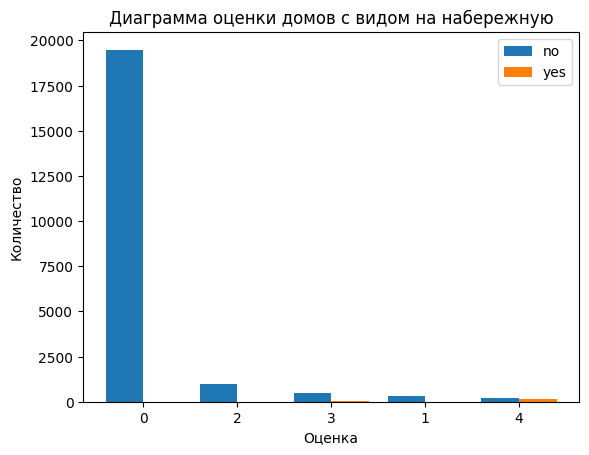

In [4]:
data = pd.crosstab(house['view'], house['waterfront']).reset_index().sort_values(by=0, ascending=False)
data.rename(columns={0: 'no', 1: 'yes'}, inplace=True)
data
n_ticks = np.arange(len(data['no']))
offset = 0.2
w = 0.4
plt.bar(n_ticks - offset, data['no'], width=w)
plt.bar(n_ticks + offset, data['yes'], width=w)
plt.title('Диаграмма оценки домов с видом на набережную')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.legend(['no', 'yes'])
plt.xticks(n_ticks, data['view']);

Количество домов в данных в зависимости от вида на набережную и оценкой вида. Диагарамма демонстрирует, что больше всего домов с хорошей оценкой у нас там, где есть вид на набережную.

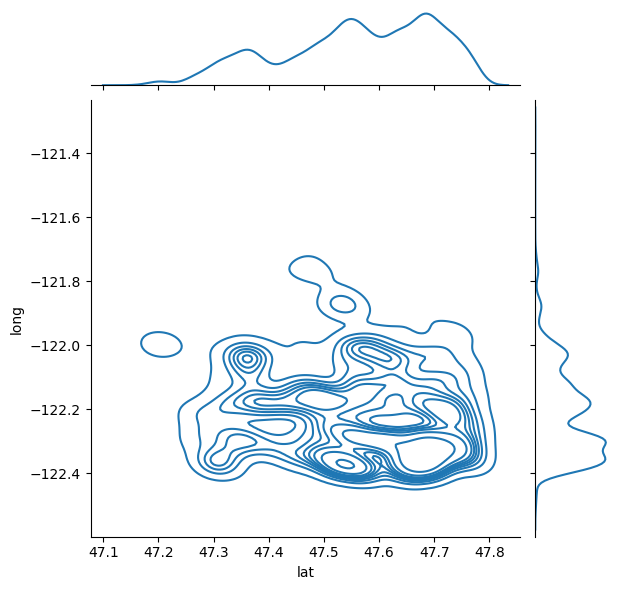

In [3]:
sns.jointplot(x=house['lat'], y=house['long'], kind='kde');

На этом графике чем более скученные эллипсы, тем в этих значениях находятся больше точек. Значит в наших данных точно есть какие-то 2-4 города.

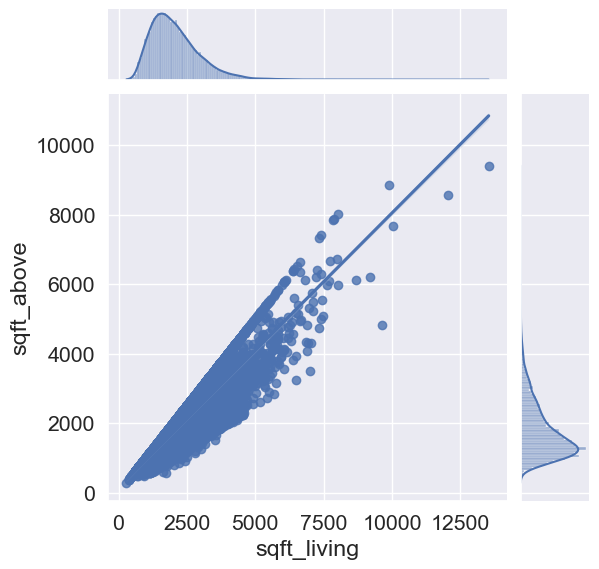

In [15]:
sns.jointplot(x=house['sqft_living'], y=house['sqft_above'], kind='reg');

На графике видно, что чем выше дом, тем больше вроятность, что там кто-то живет 

C:\Users\colda\AppData\Local\Temp\ipykernel_272\2757186378.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = house.corr()


Text(0.5, 1.0, 'Correlation matrix')

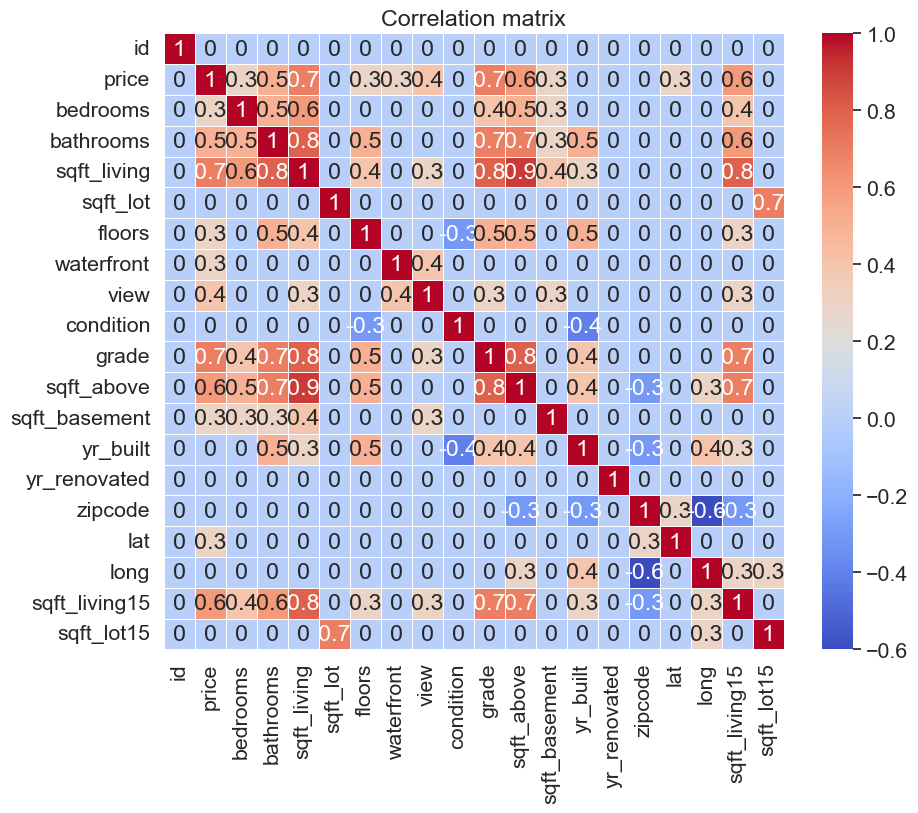

In [14]:
corr_matrix = house.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

Маьрица корруляции для данных.
Наиболее коррелируемые признаки:
1. Широта и долгота. У них сильная обратная линейная связь
2. Высота дома и вероятность, что кто-то там живет
3. Цена и вероятность, что кто-то там живет

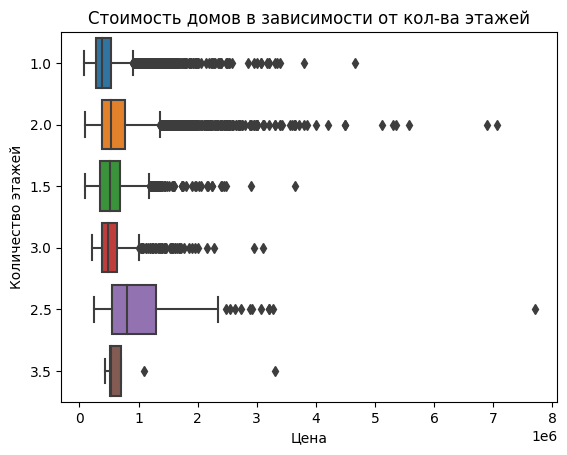

In [4]:
sns.boxplot(x=house['price'], y=house['floors'].astype('str'), whis=1.5);
plt.xlabel('Цена')
plt.ylabel('Количество этажей')
plt.title('Стоимость домов в зависимости от кол-ва этажей');

Наибольшую стоимость имеют дома с количеством этажей 2,5